In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import seaborn as sns

In [2]:
dt = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

print (dt.shape)

(7043, 21)


In [3]:
dt.head()

,customerID,gender,SeniorCitizen,Married,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Married             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [5]:
dt["TotalCharges"] = dt["TotalCharges"].convert_objects(convert_numeric=True)

/home/kshitiz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [6]:

dt['SeniorCitizen']=dt['SeniorCitizen'].replace(to_replace = 0, value ="No")#changing senior citizen values from 0 and 1 to yes and no

In [7]:
dt['SeniorCitizen']=dt['SeniorCitizen'].replace(to_replace = 1, value ="Yes")

In [8]:
dt['MultipleLines']=dt['MultipleLines'].replace(to_replace = 'No phone service', value ="No")
dt=dt.replace(to_replace = 'No internet service',value ='No')

In [9]:
dt.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


# dropping total charges as is it correlated to monthly and some 11 cases are missing


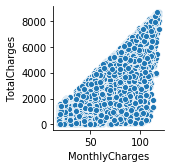

In [10]:
sns.pairplot(dt,y_vars=['TotalCharges'],x_vars=['MonthlyCharges'])#correlation

In [11]:
dt.groupby(["Contract", "Churn"]).size()#useful

Contract        Churn
Month-to-month  No       2220
                Yes      1655
One year        No       1307
                Yes       166
Two year        No       1647
                Yes        48
dtype: int64

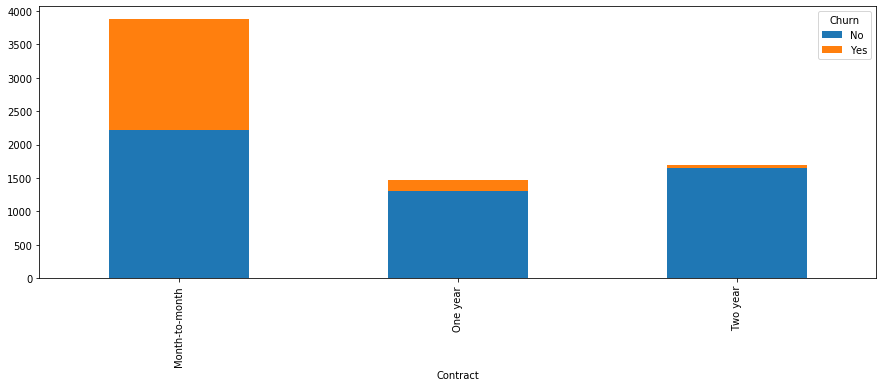

In [12]:
dt.groupby(["Contract", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(15,5)) 

In [13]:
dt.groupby(["gender", "Churn"]).size()#not useful

gender  Churn
Female  No       2549
        Yes       939
Male    No       2625
        Yes       930
dtype: int64

In [14]:
dt.groupby(["SeniorCitizen", "Churn"]).size()#MAYBE useful

SeniorCitizen  Churn
No             No       4508
               Yes      1393
Yes            No        666
               Yes       476
dtype: int64

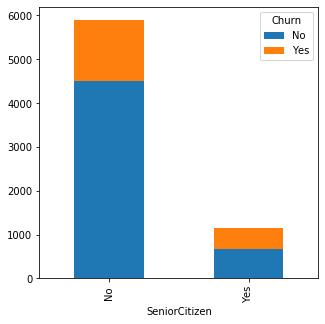

In [15]:
dt.groupby(["SeniorCitizen", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5) )

In [16]:
dt.groupby(["Married", "Churn"]).size()#ok

Married  Churn
No       No       2441
         Yes      1200
Yes      No       2733
         Yes       669
dtype: int64

In [17]:
dt.groupby(["Dependents", "Churn"]).size()#ok

Dependents  Churn
No          No       3390
            Yes      1543
Yes         No       1784
            Yes       326
dtype: int64

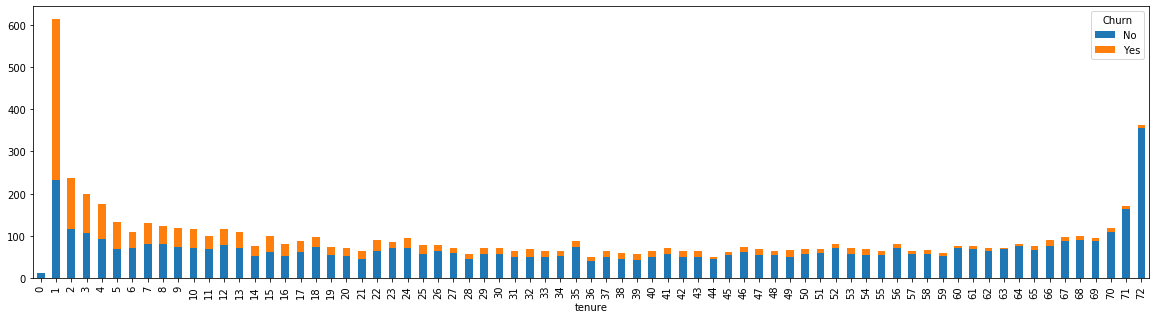

In [18]:
dt.groupby(["tenure", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(20,5) )#useful

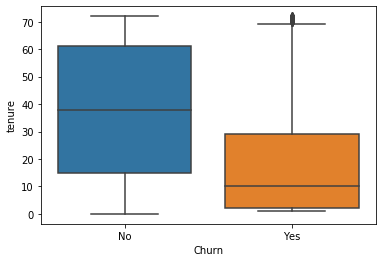

In [19]:
box1=sns.boxplot(y='tenure',x='Churn',data=dt)

In [20]:
dt.groupby(["MultipleLines", "Churn"]).size()#not useful

MultipleLines  Churn
No             No       3053
               Yes      1019
Yes            No       2121
               Yes       850
dtype: int64

In [21]:
dt.groupby(["InternetService", "Churn"]).size()

InternetService  Churn
DSL              No       1962
                 Yes       459
Fiber optic      No       1799
                 Yes      1297
No               No       1413
                 Yes       113
dtype: int64

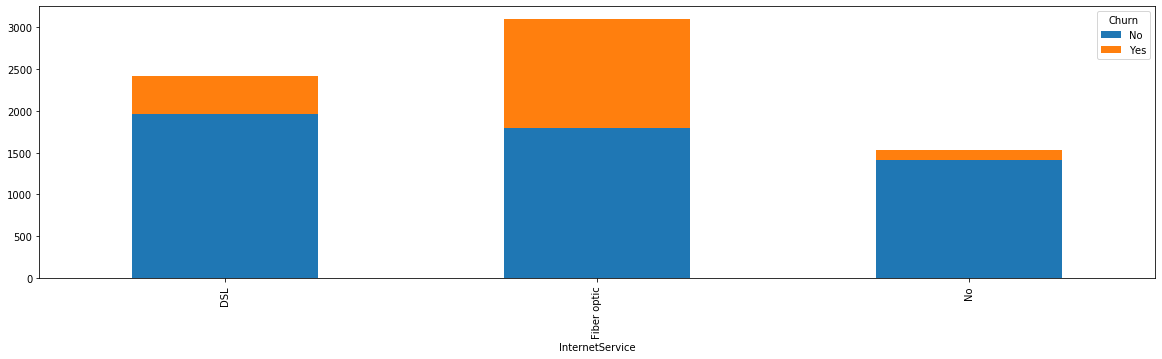

In [22]:
dt.groupby(["InternetService", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(20,5) )#useful

In [23]:
dt.groupby(["OnlineSecurity", "Churn"]).size()

OnlineSecurity  Churn
No              No       3450
                Yes      1574
Yes             No       1724
                Yes       295
dtype: int64

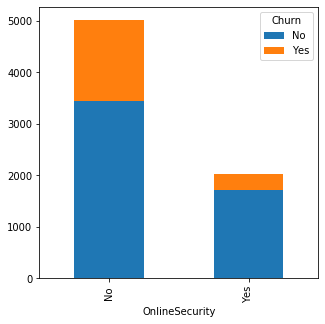

In [24]:
dt.groupby(["OnlineSecurity", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5) )#useful

In [25]:
dt.groupby(["OnlineBackup", "Churn"]).size()#ok

OnlineBackup  Churn
No            No       3268
              Yes      1346
Yes           No       1906
              Yes       523
dtype: int64

In [26]:
dt.groupby(["DeviceProtection", "Churn"]).size()#ok

DeviceProtection  Churn
No                No       3297
                  Yes      1324
Yes               No       1877
                  Yes       545
dtype: int64

In [27]:
dt.groupby(["TechSupport", "Churn"]).size()

TechSupport  Churn
No           No       3440
             Yes      1559
Yes          No       1734
             Yes       310
dtype: int64

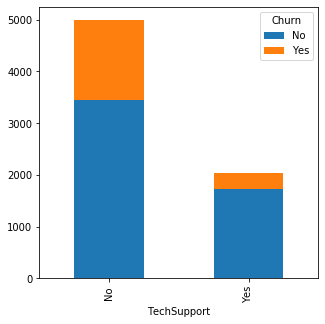

In [28]:
dt.groupby(["TechSupport", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5) )#useful

In [29]:
dt.groupby(["StreamingTV", "Churn"]).size()#not useful

StreamingTV  Churn
No           No       3281
             Yes      1055
Yes          No       1893
             Yes       814
dtype: int64

In [30]:
dt.groupby(["StreamingMovies", "Churn"]).size()#not useful

StreamingMovies  Churn
No               No       3260
                 Yes      1051
Yes              No       1914
                 Yes       818
dtype: int64

In [31]:
dt.groupby(["PaperlessBilling", "Churn"]).size()

PaperlessBilling  Churn
No                No       2403
                  Yes       469
Yes               No       2771
                  Yes      1400
dtype: int64

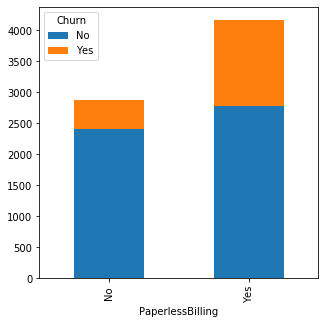

In [32]:
dt.groupby(["PaperlessBilling", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5) )#useful

In [33]:
dt.groupby(["PaymentMethod", "Churn"]).size()#not relevant 

PaymentMethod              Churn
Bank transfer (automatic)  No       1286
                           Yes       258
Credit card (automatic)    No       1290
                           Yes       232
Electronic check           No       1294
                           Yes      1071
Mailed check               No       1304
                           Yes       308
dtype: int64

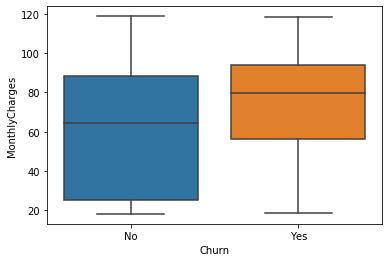

In [34]:
box2=sns.boxplot(y='MonthlyCharges',x='Churn',data=dt)#useful